In [ ]:
1.IMPORT LIBRARY
2.LOADING DATA
3.DATA PREPROCESSING
4.MISSIING VALUE TREATMENT,OUTLIER VALUE 
5.DATA VISUALIZATION
6.DATA PREPARATION FOR MODEL
     CAT-NUM
    NUM-CAT
7.SPLITTING DATA INTO TRAIN AND TEST
8.MODEL BUILDUP
9.MODEL ACCURACY AND MODEL FINALIZATION
10. MODEL DEPLOYMENT

In [1]:
import pandas as pd
import matplotlib as plt

In [3]:
df=pd.read_csv("Admission_Prediction.csv")
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [4]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [11]:
df.isna().sum()

Serial No.            0
GRE Score             0
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [ ]:
#Immuation technique

In [8]:
df["GRE Score"].mode()

0    312.0
1    324.0
dtype: float64

In [10]:
df["GRE Score"].fillna(df["GRE Score"].mode()[0],inplace=True)

In [13]:
df["TOEFL Score"].mode()

0    110.0
dtype: float64

In [14]:
df["TOEFL Score"].fillna(df["TOEFL Score"].mode()[0],inplace=True)

In [15]:
df["University Rating"].mode()

0    3.0
dtype: float64

In [16]:
df["University Rating"].mean()

3.1216494845360825

In [18]:
df["University Rating"].fillna(df["University Rating"].mean(),inplace=True)

In [19]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

<AxesSubplot:xlabel='GRE Score', ylabel='Chance of Admit'>

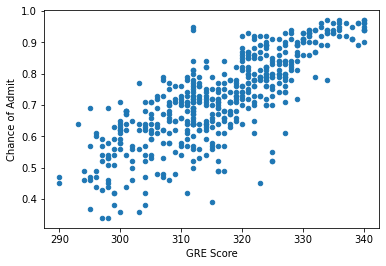

In [20]:
df.plot(kind='scatter',x="GRE Score",y='Chance of Admit')

<AxesSubplot:xlabel='TOEFL Score', ylabel='Chance of Admit'>

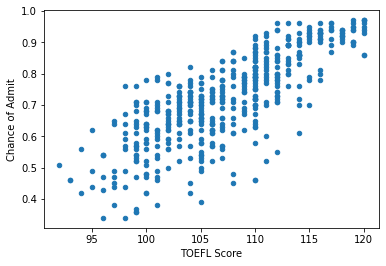

In [21]:
df.plot(kind='scatter',x="TOEFL Score",y='Chance of Admit')

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit'>

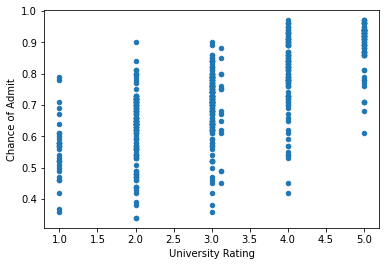

In [22]:
df.plot(kind='scatter',x="University Rating",y='Chance of Admit')

In [23]:
y=df['Chance of Admit']

In [24]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [26]:
x=df.drop(['Serial No.','Chance of Admit'],axis=1)

In [27]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.0,118.0,4.0,4.5,4.5,9.65,1
1,324.0,107.0,4.0,4.0,4.5,8.87,1
2,312.0,104.0,3.0,3.0,3.5,8.00,1
3,322.0,110.0,3.0,3.5,2.5,8.67,1
4,314.0,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.0,108.0,5.0,4.5,4.0,9.02,1
496,337.0,117.0,5.0,5.0,5.0,9.87,1
497,330.0,120.0,5.0,4.5,5.0,9.56,1
498,312.0,103.0,4.0,4.0,5.0,8.43,0


In [28]:
from sklearn.model_selection import train_test_split

In [42]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=100)

In [43]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(train_x,train_y)

LinearRegression()

In [44]:
from sklearn.metrics import r2_score
score=r2_score(reg.predict(test_x),test_y)

In [45]:
score

0.8149558487897133

In [50]:
reg.predict([[340.0,108.0,3.,4.1,4.3,9.23,0]])

array([0.83748118])